# Introducción 

ES / 

En el competitivo mundo de los gimnasios, mantener a los clientes satisfechos y fidelizados es un factor determinante del éxito. Model Fitness, consciente de este desafío, ha emprendido una iniciativa ambiciosa: aprovechar el poder de los datos analíticos para predecir y prevenir la pérdida de clientes.

Tradicionalmente, medir la pérdida de clientes en un gimnasio se basaba en métricas simples como la cancelación de membresías o la disminución de la frecuencia de visitas. Sin embargo, esta visión es limitada. Muchos clientes se "desvanecen" silenciosamente, sin realizar acciones explícitas de cancelación.

A través del análisis de los perfiles digitales de los clientes de Model Fitness, se pretende desarrollar un modelo predictivo capaz de identificar, con anticipación, a aquellos clientes con mayor probabilidad de abandonar el gimnasio.

EN / 

In the highly competitive world of gyms, keeping customers satisfied and loyal is a critical factor for success. Recognizing this challenge, Model Fitness has embarked on an ambitious initiative: leveraging the power of data analytics to predict and prevent customer churn.

Traditionally, measuring customer churn in a gym relied on simple metrics such as membership cancellations or decreased visit frequency. However, this view is limited. Many customers "fade away" silently, without taking explicit cancellation actions.

By analyzing the digital profiles of Model Fitness customers, we aim to develop a predictive model capable of identifying, in advance, those customers most likely to leave the gym.

# Objetivo 

ES /

El objetivo principal de este proyecto es desarrollar una estrategia de retención de clientes altamente efectiva para Model Fitness para contar con una herramienta valiosa para optimizar su estrategia de marketing y mejorar la experiencia del cliente, lo que se traducirá en una mayor retención y un crecimiento sostenible del negocio.

EN / 

Our primary objective is to develop a data-driven customer retention strategy for Model Fitness. Through this project, we aim to provide the company with a valuable tool to analyze customer behavior, optimize marketing efforts, and improve the overall customer experience, leading to increased customer retention and sustainable business growth.

## Carga y procesamiento de datos 

In [55]:
# Carga de librerías 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram



In [56]:
# Carga de dataset
df = pd.read_csv("gym_churn_us.csv")

# Cambio en el estilo de nombres de columnas
new_col_names = [name.strip().lower().replace(' ', '_') for name in df.columns]
df.columns = new_col_names

# Cambio de tipo de dato de la columna 'month_to_end_contract'
df['month_to_end_contract'] = df['month_to_end_contract'].astype(int)



# Mostrar información básica por pantalla
print(df.info())
print()
print("Cantidad de duplicados: {} ".format(df.duplicated().sum()))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int32  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

**Se tienen 4,000 registros. No hay recuente de valores nulos y no se tienen duplicados explicitos.**

In [57]:
# Verificación de los datos que contiene cada columna
columns = df.columns

for col in columns:
    print(df[col].sample(5))

491     0
3576    0
3629    0
3430    0
982     0
Name: gender, dtype: int64
3384    1
1729    1
494     1
129     1
1494    1
Name: near_location, dtype: int64
1391    1
2271    1
2885    0
1950    0
2692    1
Name: partner, dtype: int64
2336    0
1379    0
214     0
1947    0
2520    0
Name: promo_friends, dtype: int64
210     1
422     1
1975    0
2157    1
1114    1
Name: phone, dtype: int64
1223    1
3881    1
2946    1
310     6
1445    6
Name: contract_period, dtype: int64
3373    1
3145    0
3518    0
923     0
3358    0
Name: group_visits, dtype: int64
425     28
1261    28
2080    29
851     33
49      27
Name: age, dtype: int64
2341      8.428701
1626    119.748512
1330    133.479224
3522     73.627100
1919    258.405823
Name: avg_additional_charges_total, dtype: float64
58       6
26       6
885     12
3502     1
1382     6
Name: month_to_end_contract, dtype: int32
2509    7
2796    3
1958    4
733     6
2943    1
Name: lifetime, dtype: int64
2359    0.372201
72      1.7258

### Procesamiento de datos

In [58]:
# Descripción de los datos excluyendo columnas con datos binarios
df[['contract_period','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']].describe()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.681250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,4.549706,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,6.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

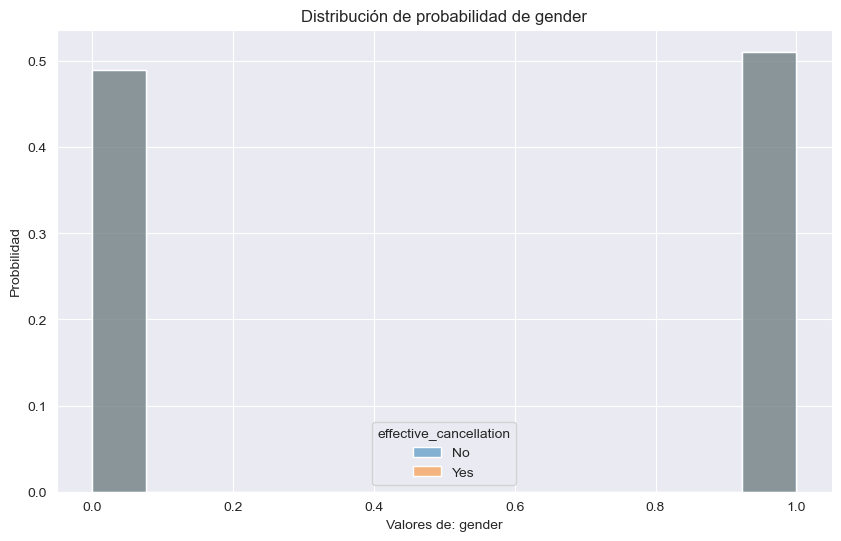

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

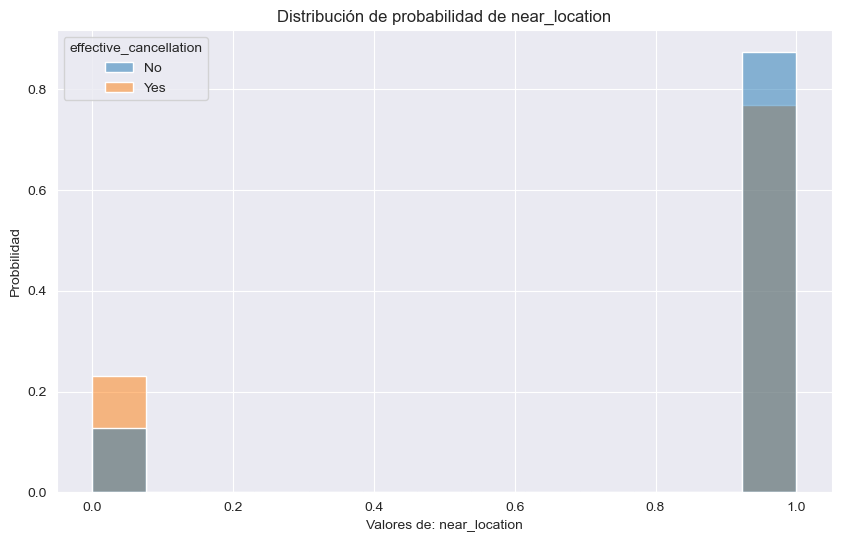

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

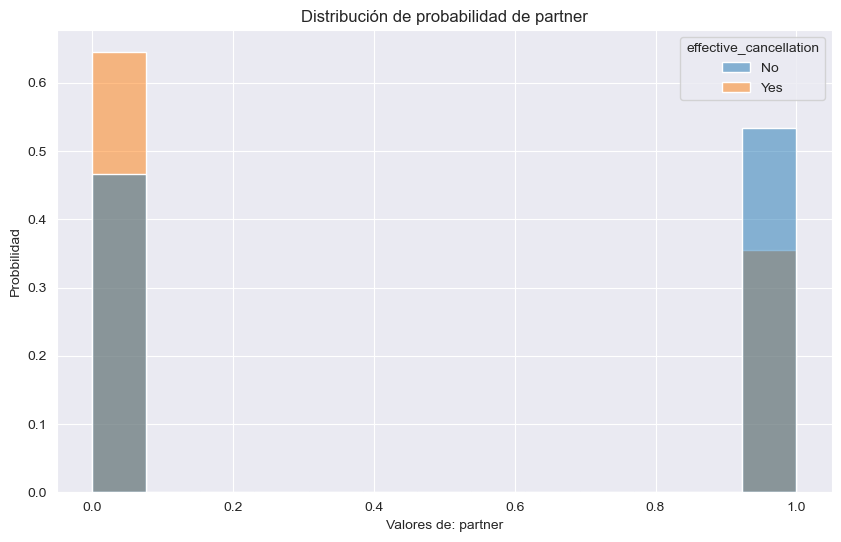

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

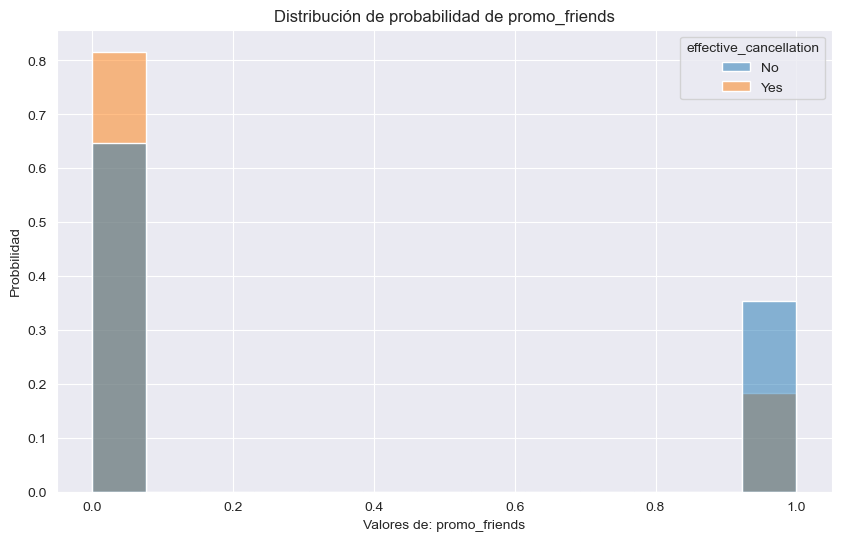

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

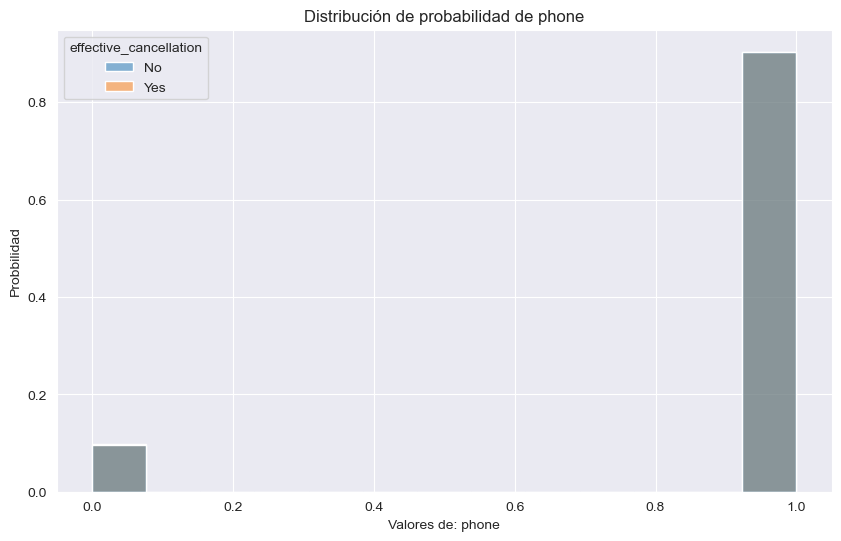

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

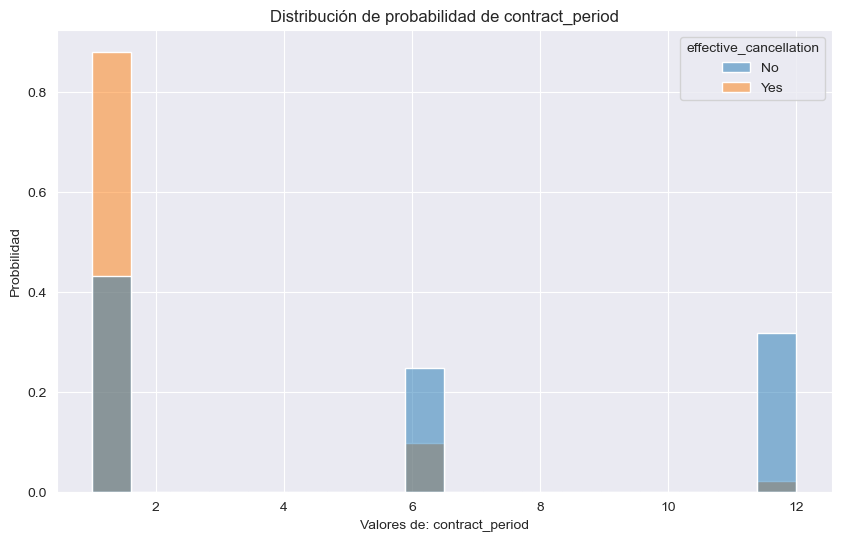

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

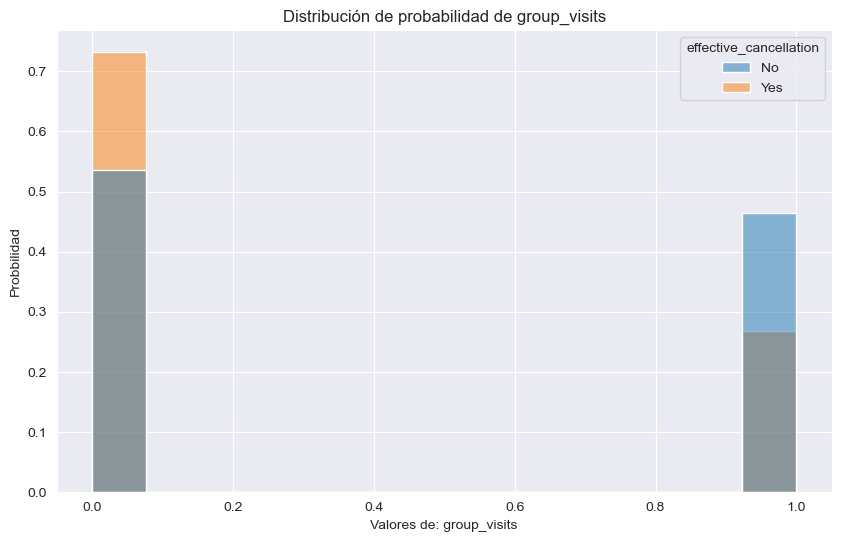

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

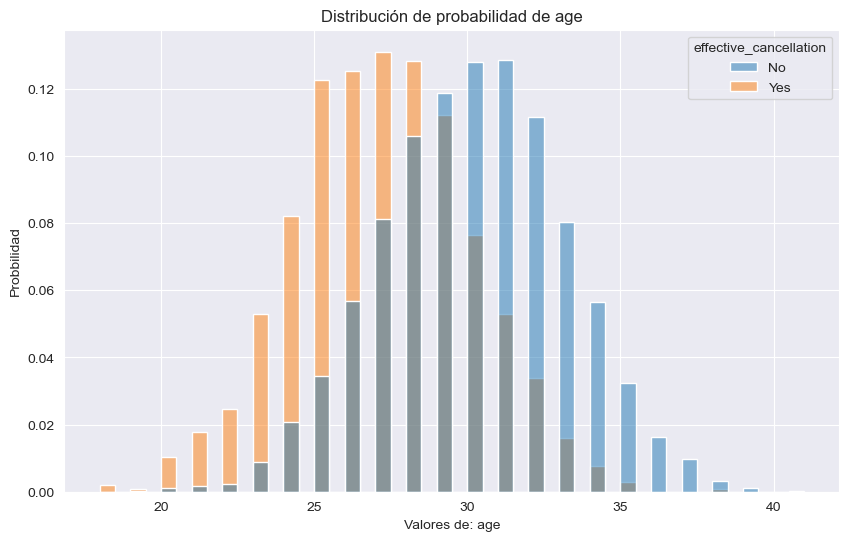

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

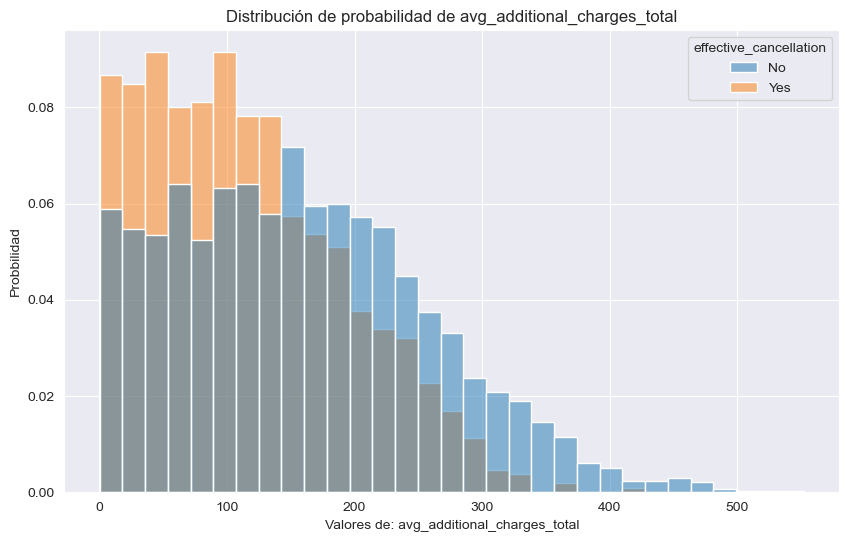

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

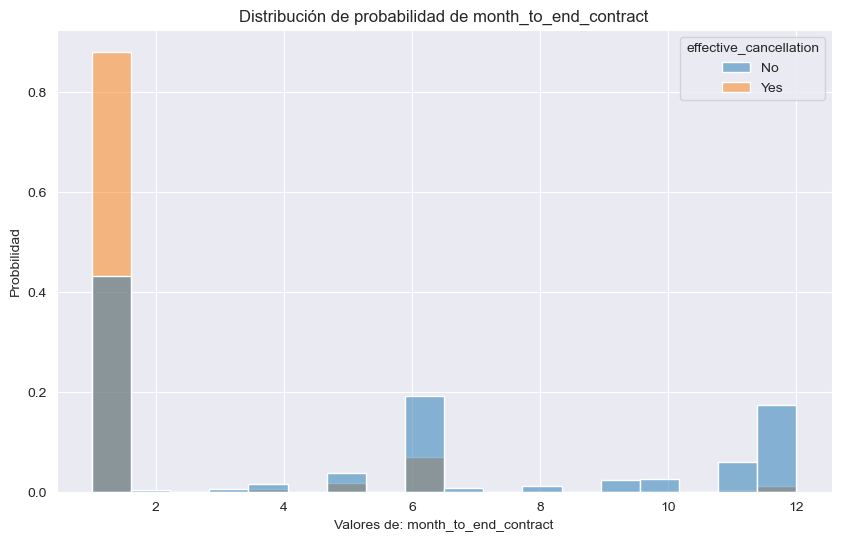

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

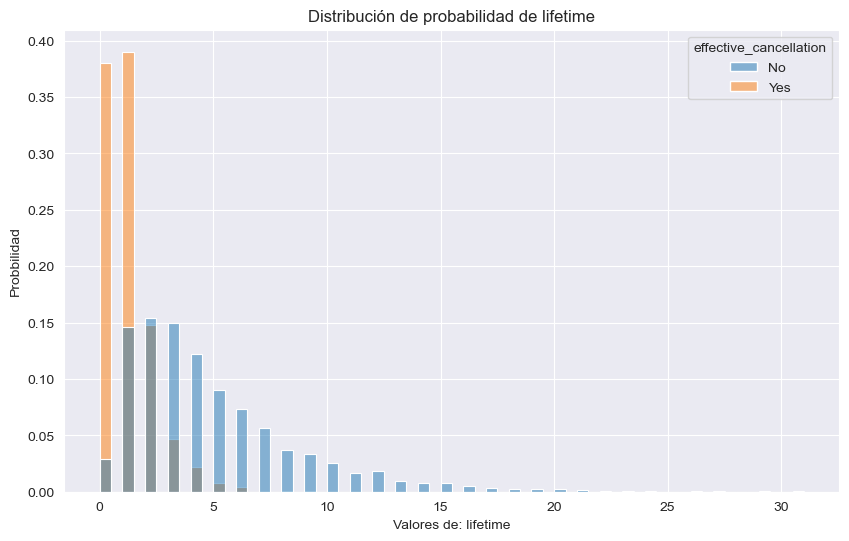

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

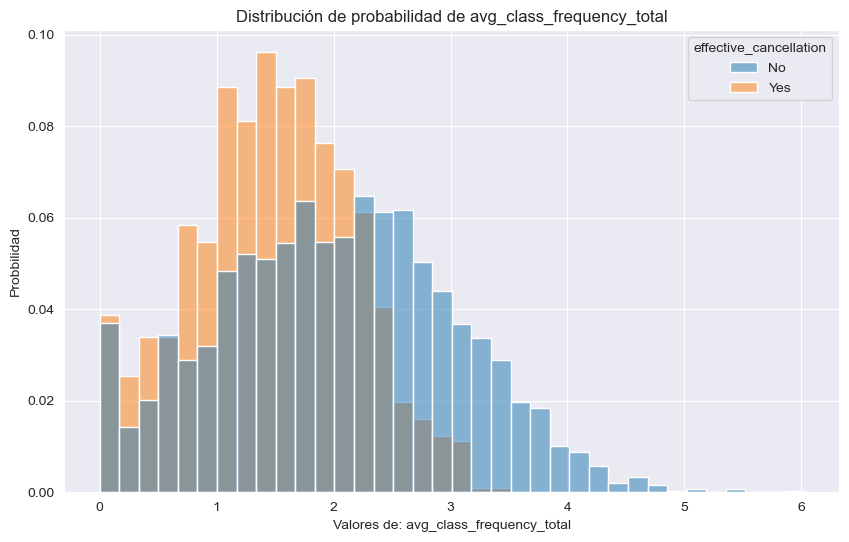

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

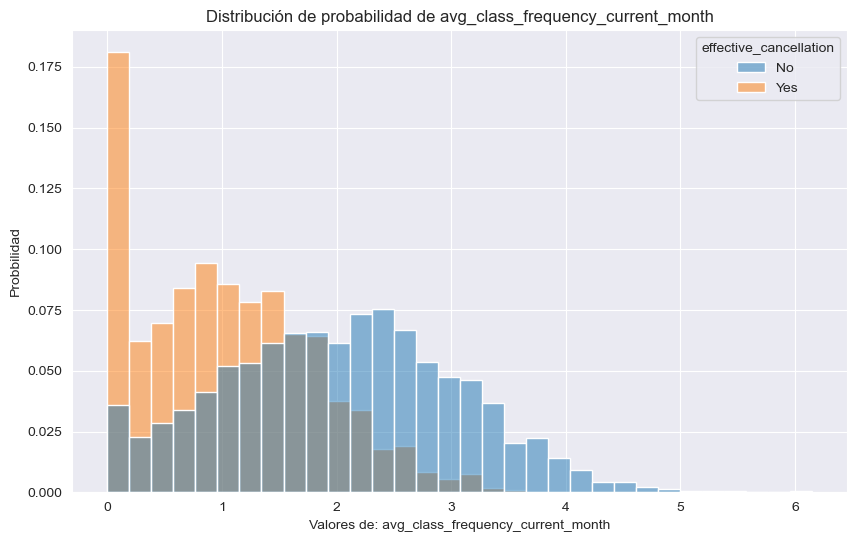

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

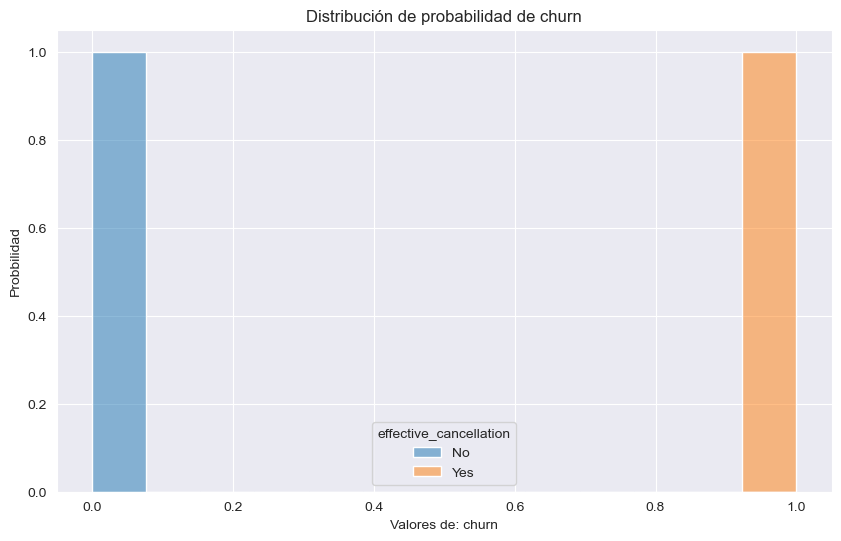

c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ibtjl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

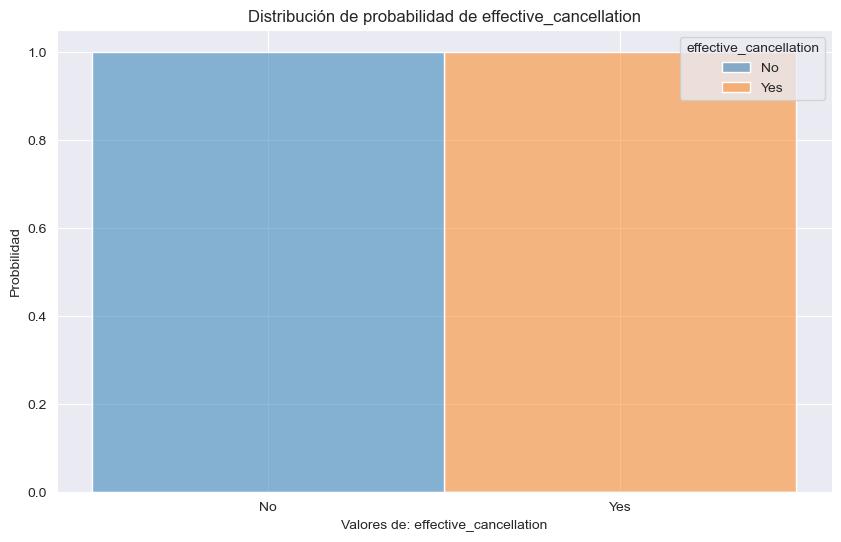

In [59]:
# Creación de la columna 'effective_cancellation'
# Se usa la función map 
df['effective_cancellation'] = df['churn'].map({0:'No', 1:'Yes'})

#Gráficos de histograma para cada columna
data_cols = df.columns

for col in data_cols:
    sns.set_style(style='darkgrid')
    plt.figure(figsize = (10,6))
    sns.histplot(data = df, x = col, ax=plt.gca(), hue='effective_cancellation',  stat='probability', common_norm=False, legend= True)
    plt.title(f'Distribución de probabilidad de {col}')
    plt.xlabel(f'Valores de: {col}')
    plt.ylabel('Probbilidad')
    plt.show()

### Observaciones importantes en análisis de gráficos


La proximidad al gimnasio parece ser un factor clave de retención, al facilitar la asistencia. Los usuarios que ingresan por convenio empresarial muestran una mayor tasa de cancelación, posiblemente debido a cambios laborales. Por el contrario, la presencia de un compañero, la participación en clases grupales, una mayor edad, el incremento de servicios adicionales y la antigüedad en la membresía se asocian con una menor probabilidad de cancelación

In [60]:
# Observación de datos para agrupación por cancelación 

# filtrado para usuarios que no cancelaron 
df_churn0 = df.query('churn == 0')

# filtrado para usuarios que cancelaron 
df_churn1 = df.query('churn == 1')

In [61]:
# Comparación de los datos para df filtrado por 'churn'
df_churn0[['contract_period','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']].describe()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000,2939.000000
mean,5.747193,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
std,4.716942,3.009933,99.801599,4.363522,3.874780,1.016006,1.018994
min,1.000000,19.000000,0.171862,1.000000,0.000000,0.000000,0.000000
25%,1.000000,28.000000,76.920993,1.000000,2.000000,1.283137,1.297021
50%,6.000000,30.000000,149.881171,6.000000,4.000000,2.043252,2.046697
75%,12.000000,32.000000,224.448274,10.000000,6.000000,2.732944,2.740648
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


In [62]:
df_churn1[['contract_period','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']].describe()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000
mean,1.728558,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546
std,2.132371,2.895163,77.696419,1.964593,1.110799,0.694705,0.770237
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,25.000000,50.629127,1.000000,0.000000,1.010771,0.421337
50%,1.000000,27.000000,103.814686,1.000000,1.000000,1.491187,0.979445
75%,1.000000,29.000000,165.616858,1.000000,1.000000,1.956438,1.588576
max,12.000000,38.000000,425.535220,12.000000,9.000000,3.478646,3.540271


In [63]:
# Proporción de usuarios en churn0 y churn1 en el dataset

churn_0 = np.round((len(df_churn0) / len(df)) * 100, 2)
churn_1 = np.round((len(df_churn1) / len(df)) * 100, 2)

print(f'Porcentaje de usuarios que no cancelaron = {churn_0}')
print(f'Proporción de usuarios que cancelaron = {churn_1}')

Porcentaje de usuarios que no cancelaron = 73.47
Proporción de usuarios que cancelaron = 26.52


Al comparar ambos grupos, se observan patrones interesantes. Los usuarios que no cancelaron (churn0, 73.47% de los datos en el dataset) presentan una mayor antigüedad en la plataforma, un gasto promedio más elevado en servicios adicionales y una duración de contrato remanente significativamente mayor. Esto sugiere una mayor fidelidad y compromiso con el servicio. Por otro lado, los usuarios que sí cancelaron (churn1, 26.52% de los datos en el dataset) exhiben una menor antigüedad, un gasto promedio inferior y una duración de contrato más corta, indicando una menor satisfacción o intención de continuar. Aunque la frecuencia de clases parece ser mayor en el grupo churn1, se requiere un análisis más profundo para determinar si esta correlación es causal o si se debe a otros factores. Estos hallazgos iniciales sugieren que estrategias enfocadas en recompensar la lealtad, incentivar gastos adicionales y ofrecer planes de suscripción más atractivos podrían ayudar a reducir la tasa de cancelación. 

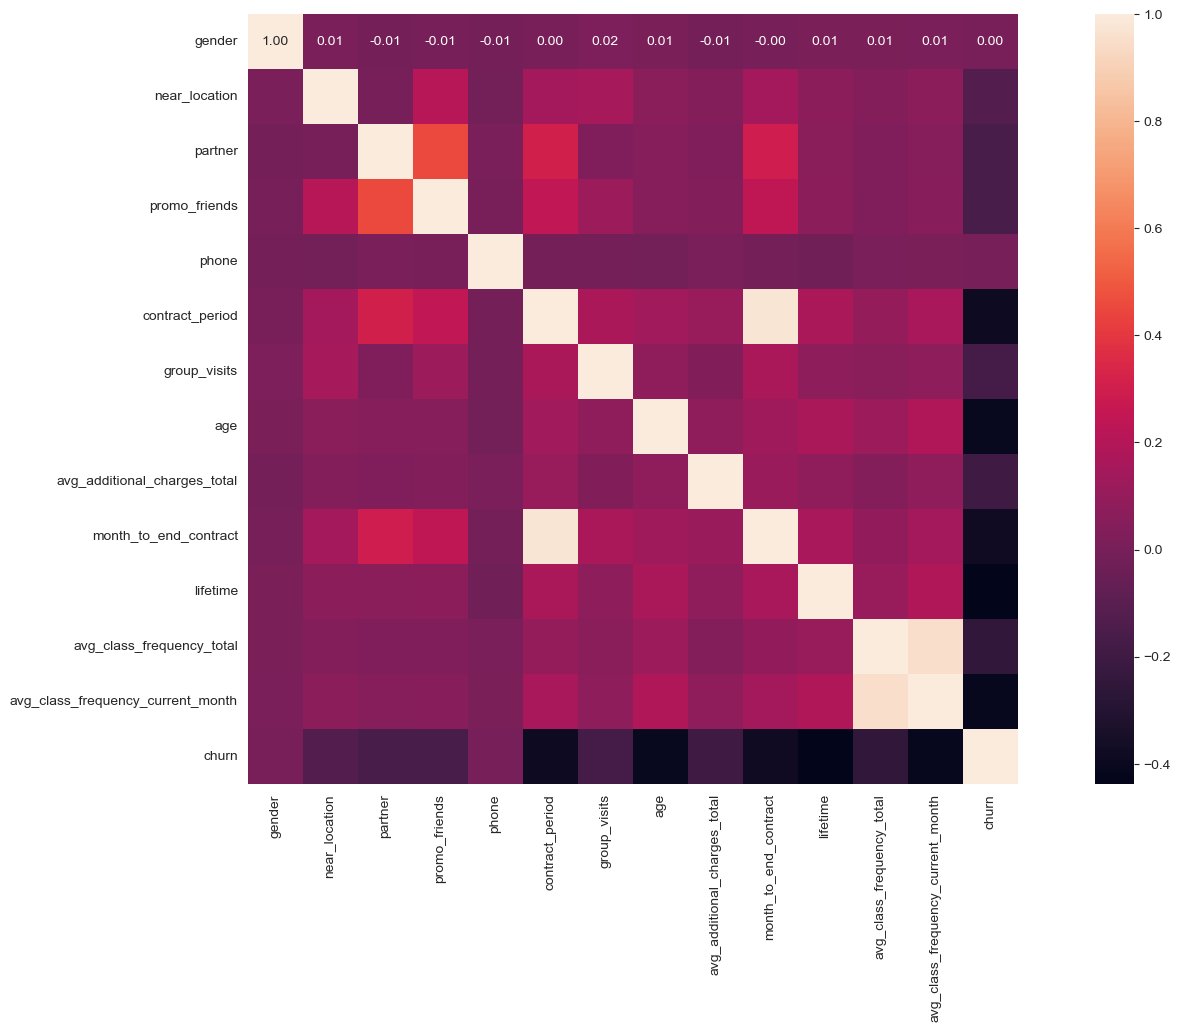

In [64]:
# Matriz de correlación como mapa de calor 
corr_m = df.drop('effective_cancellation', axis =1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_m, annot=True, square=True, fmt='.2f', annot_kws={"size": 10})
plt.show()

¿Qué características están corelacionadas (de forma positiva o negativa) con la variable churn

In [65]:
# Matriz de correlación 
corr_m

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


In [66]:
# obtención de valores de correlación para churn comparada con las otras características y ordenando de mayor a menor. 

churn_corr_values = corr_m['churn'].sort_values(ascending=False).reset_index()
# Se utiliza drop(índice 0)
churn_corr_values = churn_corr_values.drop(0).reset_index(drop='level_0')
churn_values = churn_corr_values.tail(5)


Se observa que las variables que se encuentran inversamente relacionadas (son indicio de no cancelación): lifetime, avg_class_frequency_curryent_month, age, contract_period.

* Mayor antigüedad, mayor compromiso: Los miembros que llevan más tiempo en el gimnasio han tenido más oportunidades de experimentar los beneficios de su membresía y han establecido una rutina. Este mayor compromiso reduce la probabilidad de cancelación.
* Mayor participación, mayor satisfacción: Los miembros que asisten a más clases están más involucrados en la comunidad del gimnasio y probablemente están más satisfechos con los resultados que están obteniendo. Esto aumenta su lealtad.
* Mayor conciencia de salud: A medida que las personas envejecen, suelen ser más conscientes de la importancia de mantener una buena salud, lo que los motiva a continuar con su rutina de ejercicio.
* Mayor compromiso financiero: Los contratos a largo plazo implican un mayor compromiso financiero por parte del miembro, lo que los disuade de cancelar prematuramente.

In [67]:
"""Se deja sin efecto esta celda ya que se enfoca análisis en las variables comparadas con churn"""

"""# Selección de los pares de variables con mayor correlación
def get_high_correlation_pairs(corr_matrix, threshold=0.8):
    """
    #Esta funcíon encuentra los pares de valores que tienen una correlación mayor al umbral especificado.

    #Paramter: corr_matrix, dataset con la matriz de correlación.
    #Parameter: threshold, valor de umbral de correlación.

    #Returns: lista de tuplas con los pares de valores con alta correlación.
"""
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    
    return high_corr_pairs


high_corr_pairs = get_high_correlation_pairs(corr_m)


for pair in high_corr_pairs:
    print(f"{pair[0]} y {pair[1]}: {pair[2]:.2f}")
"""

'\n    high_corr_pairs = []\n    for i in range(len(corr_matrix.columns)):\n        for j in range(i + 1, len(corr_matrix.columns)):\n            if abs(corr_matrix.iloc[i, j]) > threshold:\n                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))\n    \n    return high_corr_pairs\n\n\nhigh_corr_pairs = get_high_correlation_pairs(corr_m)\n\n\nfor pair in high_corr_pairs:\n    print(f"{pair[0]} y {pair[1]}: {pair[2]:.2f}")\n'

In [68]:
#Se deja sin efecto esta celda ya que se enfoca análisis en las variables comparadas con churn

"""fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Primer gráfico de dispersión
axs[0].set_title("contract_period vs month_to_end_contract")
sns.scatterplot(data=df, x='contract_period', y='month_to_end_contract', ax=axs[0])

# Segundo gráfico de dispersión
axs[1].set_title("avg_class_frequency_total vs avg_class_frequency_current_month")
sns.scatterplot(data=df, x='avg_class_frequency_total', y='avg_class_frequency_current_month', ax=axs[1])

plt.tight_layout()
plt.show()"""

'fig, axs = plt.subplots(1, 2, figsize=(10, 5))\n\n# Primer gráfico de dispersión\naxs[0].set_title("contract_period vs month_to_end_contract")\nsns.scatterplot(data=df, x=\'contract_period\', y=\'month_to_end_contract\', ax=axs[0])\n\n# Segundo gráfico de dispersión\naxs[1].set_title("avg_class_frequency_total vs avg_class_frequency_current_month")\nsns.scatterplot(data=df, x=\'avg_class_frequency_total\', y=\'avg_class_frequency_current_month\', ax=axs[1])\n\nplt.tight_layout()\nplt.show()'

Los pares (contract_period / month_to_end_contract) y (avg_class_frequency_total / avg_class_frequency_current_month), son los que tienen los valoers de correlación más altos. 

In [69]:
# Se deja sin efecto esta cela para no repetir información proporcionada por el histograma
"""# Diagramas de distribución pareados para usuarios que cancelaron (churn = 1) y usuarios que no cancelaron (churn = 0)

c_list= ['contract_period','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']

for col in c_list:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=df[col], y=df['churn'])
    plt.xlabel(col)
    plt.ylabel('Churn')
    plt.title(f'Relación de {col} vs churn')
    plt.show()"""

"# Diagramas de distribución pareados para usuarios que cancelaron (churn = 1) y usuarios que no cancelaron (churn = 0)\n\nc_list= ['contract_period','age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']\n\nfor col in c_list:\n    plt.figure(figsize=(10,5))\n    sns.scatterplot(x=df[col], y=df['churn'])\n    plt.xlabel(col)\n    plt.ylabel('Churn')\n    plt.title(f'Relación de {col} vs churn')\n    plt.show()"

# Modelo para predecir la cancelación de usuarios

Para esta sección se emplearon los modelos de regresión logística y bosque aleatorio. 

La regresión logística se enfoca en predecir la probabilidad de que una observación pertenezca a una categoría específica, utilizando una función sigmoidea para asignar un valor entre 0 y 1. Por otro lado, los bosques aleatorios son un conjunto de árboles de decisión que trabajan en conjunto para realizar predicciones más precisas y robustas. Estos modelos se diferencian en su funcionamiento interno, pero ambos son herramientas valiosas en diversas aplicaciones, como la clasificación de clientes. La elección del modelo adecuado dependerá de las características del conjunto de datos y del problema específico a resolver.

In [70]:
# Obtención de variable objetivo y características 
df.drop('effective_cancellation', axis = 1, inplace = True)
X = df.drop('churn', axis = 1)
y = df['churn']

# División en conjuntos de entrenamiento y prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0)

# Escalado de variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelos
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier()

# Entrenamiento
logistic_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Predicciones
logistic_pred = logistic_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

# Probabilidades para AUC y Log Loss
logistic_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]
rf_prob = rf_model.predict_proba(X_test_scaled)[:, 1]

# Métricas
metrics = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, logistic_pred),
        "Precision": precision_score(y_test, logistic_pred),
        "Recall": recall_score(y_test, logistic_pred),
        "F1 Score": f1_score(y_test, logistic_pred),
        "AUC-ROC": roc_auc_score(y_test, logistic_prob),
        "Log Loss": log_loss(y_test, logistic_prob),
        "Confusion Matrix": confusion_matrix(y_test, logistic_pred)
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, rf_pred),
        "Precision": precision_score(y_test, rf_pred),
        "Recall": recall_score(y_test, rf_pred),
        "F1 Score": f1_score(y_test, rf_pred),
        "AUC-ROC": roc_auc_score(y_test, rf_prob),
        "Log Loss": log_loss(y_test, rf_prob),
        "Confusion Matrix": confusion_matrix(y_test, rf_pred)
    }
}

# Imprimir las métricas
for model, metric in metrics.items():
    print(f"\n{model} Metrics:")
    for m, value in metric.items():
        if m == "Confusion Matrix":
            print(f"{m}:\n{value}")
        else:
            print(f"{m}: {value:.2f}")


Logistic Regression Metrics:
Accuracy: 0.93
Precision: 0.87
Recall: 0.85
F1 Score: 0.86
AUC-ROC: 0.97
Log Loss: 0.18
Confusion Matrix:
[[2246  107]
 [ 129  718]]

Random Forest Metrics:
Accuracy: 0.91
Precision: 0.86
Recall: 0.77
F1 Score: 0.81
AUC-ROC: 0.96
Log Loss: 0.23
Confusion Matrix:
[[2251  102]
 [ 198  649]]


* Accuracy: La regresión logística tiene una precisión ligeramente superior (0.93 vs 0.91).
* Precision: Ambos modelos tienen la misma precisión (0.87).
* Recall: La regresión logística tiene un mejor recall (0.85 vs 0.79).
* F1 Score: La regresión logística tiene un F1 Score superior (0.86 vs 0.83).
* AUC-ROC: La regresión logística tiene una AUC-ROC ligeramente superior (0.97 vs 0.96).
* Log Loss: La regresión logística tiene una mejor log loss (0.18 vs 0.24).
* Confusion Matrix: La regresión logística tiene menos falsos negativos (129 vs 181) y ligeramente más falsos positivos (107 vs 101).

Basado en estos resultados, se puede considerar que el modelo de regresión logistica tiene un mejor desempeño.

In [71]:
# Obtención de características y coeficientes 

features = X_train.columns
coeff = logistic_model.coef_[0]

coef_df = pd.DataFrame({'Features': features, 'Coefficient': coeff})

coef_df.sort_values(by = 'Coefficient', ascending = False)


,Features,Coefficient
11,avg_class_frequency_total,2.056597
0,gender,0.210889
2,partner,0.100743
1,near_location,-0.199820
6,group_visits,-0.277827
4,phone,-0.308517
9,month_to_end_contract,-0.399503
3,promo_friends,-0.436120
8,avg_additional_charges_total,-0.460036
5,contract_period,-0.773064


# Identificación de clusters de usuarios

c:\Users\ibtjl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


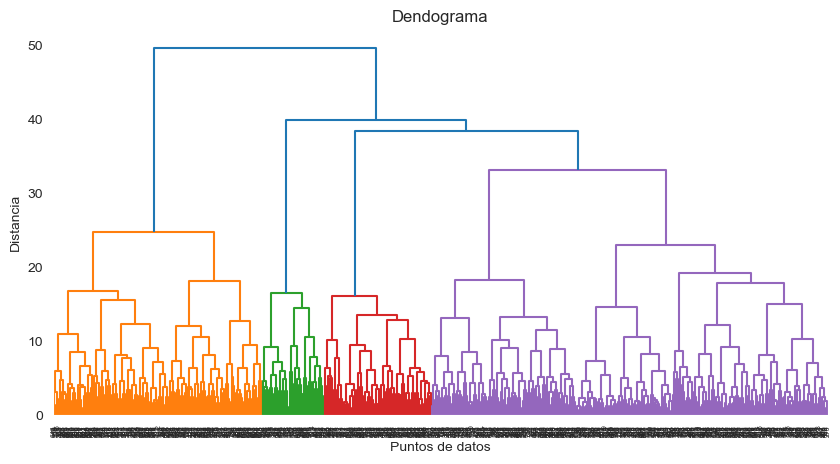

In [72]:
# Implementación de KMeans 

model_km = KMeans(n_clusters=5, random_state= 0)
model_km.fit(X_train_scaled)

# Predicción de clusters
clusters = model_km.predict(X_train_scaled)

# Creación de la columna con los clusters 
X_train['clusters'] = clusters

# Creación de matriz de distancia 
z = linkage(X_train_scaled, method = 'ward')

# Creación del dendograma 
plt.figure(figsize=(10,5))
plt.title('Dendograma')
dendrogram(z)
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia')
plt.show()


In [94]:
# Se agrupa dataframe usando clusters
churn_values_list = churn_values['index'].tolist()
df_group_cluster = X_train.groupby('clusters').mean().reset_index()
df_group_cluster[df_group_cluster.columns.intersection(churn_values_list)]


,contract_period,age,month_to_end_contract,lifetime,avg_class_frequency_current_month
0,10.585366,29.902439,9.512195,4.520325,2.954187
1,2.081081,30.189189,1.983784,5.005405,2.562718
2,2.174312,28.183486,2.036697,2.678899,1.587766
3,1.427350,28.055556,1.388889,2.316239,0.991879
4,9.241611,29.657718,8.395973,4.174497,1.107837


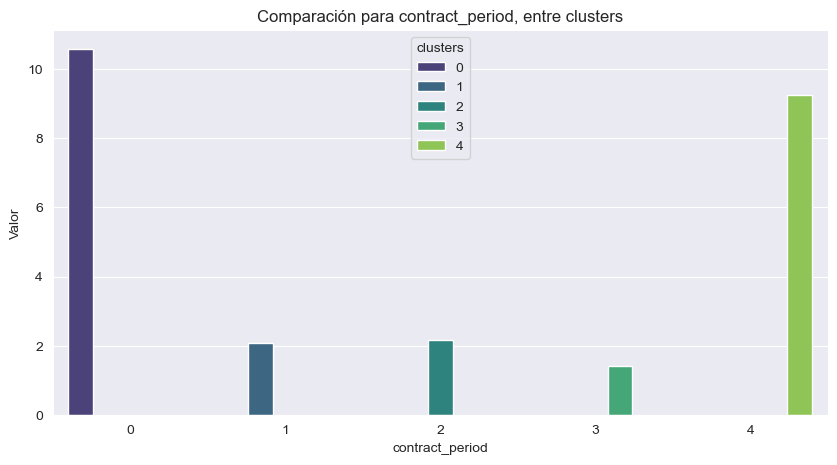

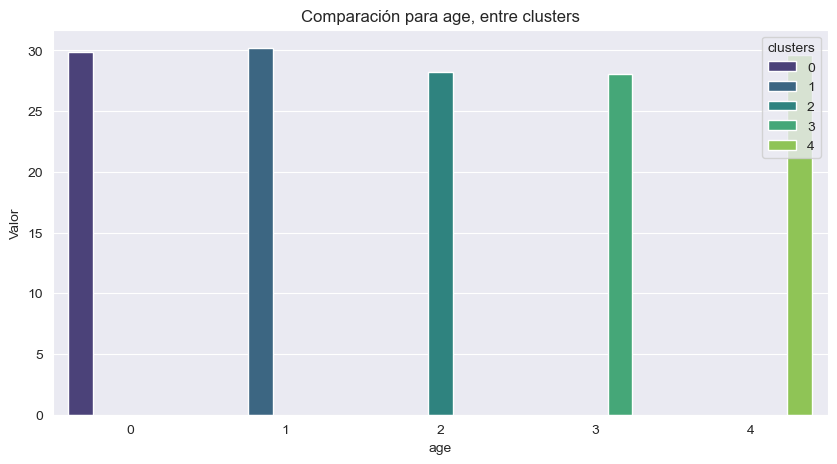

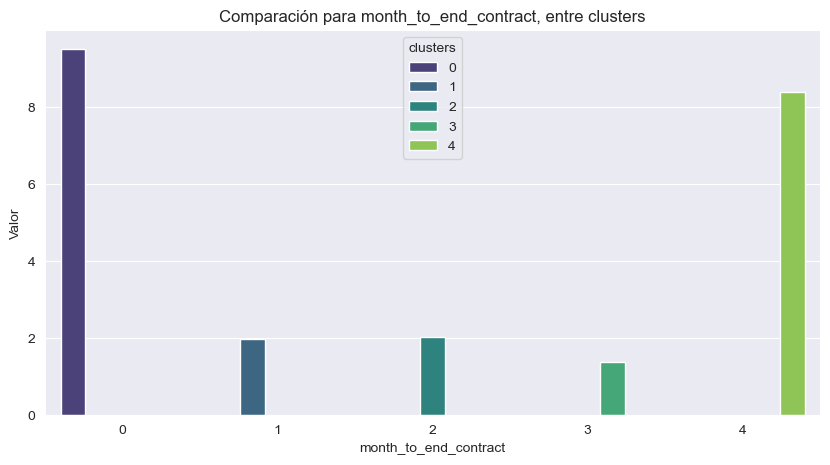

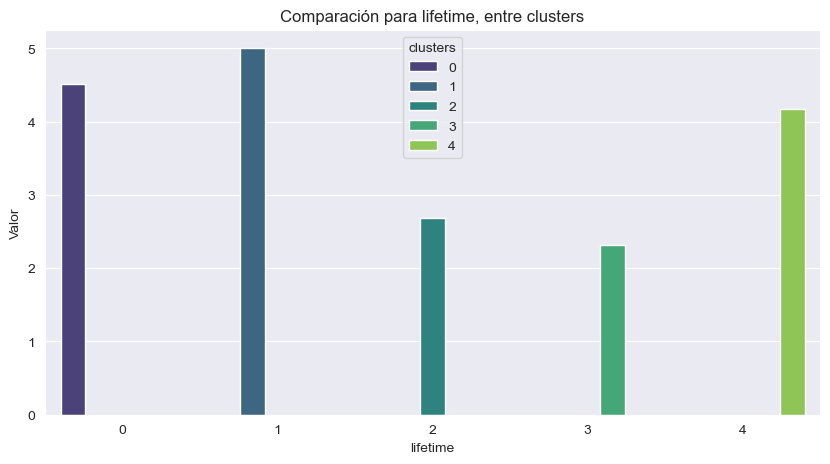

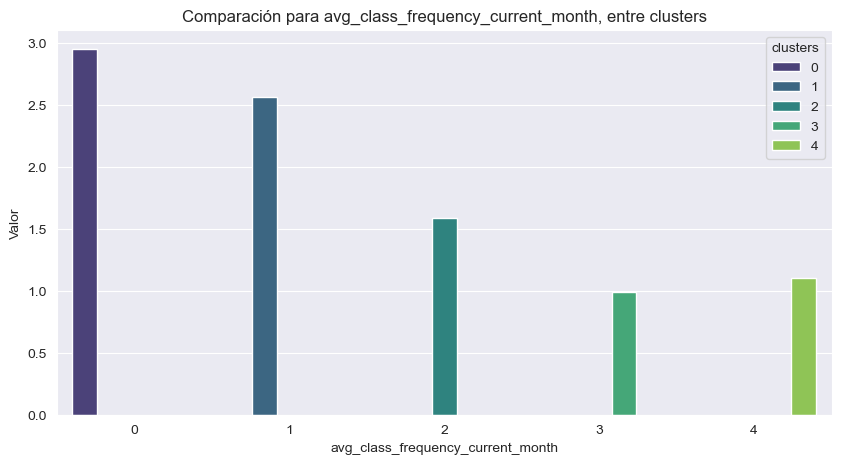

In [89]:
# Gráficos comparativos entre características más importantes relacioandas con churn
for col in df_group_cluster.columns:
    if col in churn_values_list:
        plt.figure(figsize=(10,5))
        sns.barplot(data = df_group_cluster, x = 'clusters', y = col, hue = 'clusters', palette='viridis')
        plt.title(f'Comparación para {col}, entre clusters')
        plt.ylabel('Valor')
        plt.xlabel(col)
        plt.show()

* Cluster 0 y Cluster 4: Representan usuarios con contratos largos (alrededor de 9-10 meses) pero tienen una gran diferencia en la frecuencia de clases (Cluster 0 tiene alta frecuencia mientras que Cluster 4 tiene baja).
* Cluster 1: Contratos cortos pero con moderada frecuencia de clases y una vida útil relativamente larga (5.01, años inscrito).
* Cluster 2 y Cluster 3: Ambos tienen periodos de contrato cortos y bajas frecuencias de clases, siendo Cluster 3 el de menor compromiso con la menor frecuencia de clases y tiempo de contrato.

## Algunas estrategias para mejorar la fidelización de los clientes

* Cluster 0: se reocmienda ofrecer recopmensas por alcanzar hitos de aistencia, como clases gratuitas o descuentos en productos de gimansio (para incrementar su gasto promedio), así como organizar algunos eventos eventos exclusivos, también se sugiere mantener comunicación que resalté su progreso. 
* Cluster 1: ofrecer descuetos y recompensas para promover la renovación de su contrato antes de que finalice, promocionar paquetes que se ajusten a sus objetivos a corto plazo, también se podrían implementar promociones para recomendar el gimnasio. 
* Cluster 2: introducir membresías flexibles, incluir clases que puedan resultar más atractivas para este grupo de clientes. Ofrecer seguimiento cercano para revisar su satisfacción, así como enviar mensaje motivacionales para generar una mayor asistencia. 
* Cluster 3: se pueden ofrecer pruebas gratuitas de clases de su interés para que encuentre algo que le guste, crear un programa de iniciación que no sea complicado de seguir con entrenadores que puedan guiar a los nuevos usuarios, para incrementar el acompañamiento de los nuevos usuarios. 
* Cluster 4: realizar actividades para fomentar el sentido de pertenencia y comunidad, incentivar la asistencia a clases dando algunos beneficios para incrementar la sensasción del valor de la membresía. 